# Google Colabを使ってグラフで表示してみよう
Google Colabを使うの必要なのものは以下の２つです。
- Googleメールのアカウント
- Chrome等のブラウザーを使える機器

準備ができたら、以下のURLにアクセスしてください。
```
https://colab.research.google.com/notebooks/welcome.ipynb?hl=ja
```

# 準備０
手書き風のプロットを使用するため、humor-sansフォントのインストールをします。

以下のセルを実行後「ツール」メニューからカーネルの再起動を実行してからライブラリのインポート以降を実行してください。

In [0]:
!apt-get install fonts-humor-sans >/dev/null
!rm -rf /root/.cache/matplotlib/ >/dev/null

## ライブラリのインポート
最初に、使用するライブラリをインポートします。

- pandas: データフレームを扱うライブラリ
- numpy: 行列計算のライブラリ
- seaborn: きれいなグラフを作成するライブラリ
- matplotlib: Python用のプロットライブラリ

matplotlibの出力を出力セルに埋め込むために、%matplotlib inlineを指定します。

In [0]:
# python用のライブラリ
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# データの可視化
PandasとSeabornライブラリを使ってデータを可視化してみましょう。

## データの準備
列（data）が１個だけのcsv（とは言えないませんが）ファイルを用意します。

このデータは、「データ解析のための統計モデリング入門」の２章で使われている例題から引用しました。

セルの最初の%%はマジックコードを意味し、その後のコマンドが実行されます。writefileコマンドは、セルの内容をファイルに出力します。テストデータを作ったり、ファイル単位の処理をする場合に重宝します。
```
%%writefile 出力先ファイル名
```


In [2]:
%%writefile data.csv
data
2
2
4
6
4
5
2
3
1
2
0
4
3
3
3
3
4
2
7
2
4
3
3
3
4
3
7
5
3
1
7
6
4
6
5
2
4
7
2
2
6
2
4
5
4
5
1
3
2
3

Overwriting data.csv


## データの素性を知る
pandasを使ってdata.csvのデータを読み込み、最初の５行分を出力し、describe関数を使ってデータの素性を確認します。

１個の「data」カラムに、50個のデータがあり、最小0、最大7、平均3.56、標準偏差1.72のデータだと分かりました。

In [3]:
d = pd.read_csv('data.csv')
# 最初の５個を出力
print(d.head())
# descirbe関数でデータの素性を出力
print(d.describe())

   data
0     2
1     2
2     4
3     6
4     4
           data
count  50.00000
mean    3.56000
std     1.72804
min     0.00000
25%     2.00000
50%     3.00000
75%     4.75000
max     7.00000


データフレームdの「data」カラムのデータの分布をヒストグラムで表示してみます。

pandasには、基本的なグラフの描画機能が備わっているので、データフレームに.hist()のメソッドを送るだけでヒストグラムが表示されます。
plt.show()はグラフの表示するコマンドですが、最初にinline表示指定をしているので、指定しなくてもグラフは表示されます。

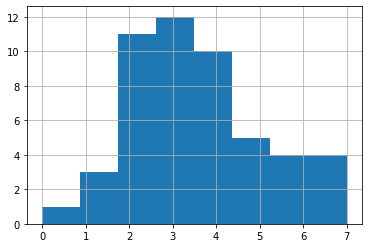

In [4]:
d['data'].hist(bins=8)
plt.show()

pandasのグラフは、簡素で見た目のさびしいので、Seabornの装飾機能を使って出力きれいにします。

Seabornの装飾機能を利用するには、sns.set()を呼び出すだけです。

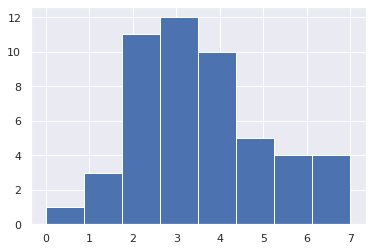

In [5]:
param = sns.set()
d['data'].hist(bins=8)
plt.show()

ちょっと脱線しますが、matplotlibの装飾機能には、手書き風のグラフを出力するxkcdがあります。

一度plt.xkcd()を呼び出すと後のグラフがすべて手書き風になってしまうので、with　plt.xkcd()の範囲だけ手書き風に出力するようにしています。


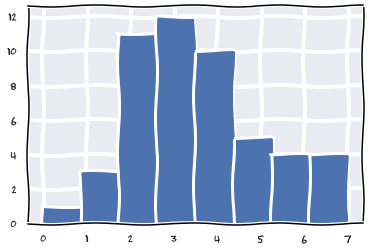

In [6]:
with plt.xkcd():
  d['data'].hist(bins=8)
  plt.show()

Pandasは、データの加工や様々な集計機能を備えています。

ヒストグラムの表示使った頻度をvalue_countsメソッドを使って計算します。

In [7]:
# 頻度を計算
histgram = pd.value_counts(d['data'])
histgram.head()

3    12
2    11
4    10
5     5
7     4
Name: data, dtype: int64

頻度分布を円グラフに表示するには、plotメソッドのサブ機能pieを使用します。

plotメソッドにどのようなサブ機能があるのか知るには、plotの後ろに?をつけて実行するとヘルプ画面表示されます。


In [0]:
histgram.plot?

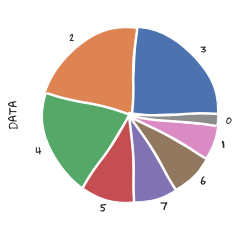

In [8]:
with plt.xkcd():
  histgram.plot.pie(y='data')
  plt.show()

### データの保存とダウンロード
pandasで計算した結果は、CSV, Excel, sqliteのデータベースに保存することができます。

以下の例では、histgramの頻度計算結果をhistgram.xlsxに保存し、PCにダウンロードします。
Google Colabではセッションが切れてしまうと、ノートブック以外のファイルは削除されてしまうため、Googleドライブに保存するか、PCにダウンロードします。

In [0]:
# データフレームdをExcel形式で出力
histgram.to_excel('histgram.xlsx')
# ダウンロード
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('histgram.xlsx')

## より高度なグラフ表示
Seabornには、とてもすばらしいグラフ機能があります。

例として、irisデータを使います。irisデータは機械学習では有名なデータで、３種類のアヤメ（setosa, versicolor, virginica）の花びらとがくの長さと幅をそれぞれ50個収集したものです。

データのダウンロードには、機械学習の代表的なライブラリScikt learnを使用します。
データフレームには、デフォルトでは数値データしか入らないので、アヤメの種類を保持したtargetを別途target列にセットしています。

データフレームを種としたら、headとdescribeでデータの素性を調べます。



In [10]:
from sklearn import datasets

# irisのデータセットを読み込み、pandasのデータフレームを作成
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### データを関連性を知る
Seabornのpairplotはとても強力です。データフレームをpairplot関数に渡すだけ（グラフが大きくなるので、height=2を追加）です。

pairplotでは、データフレーム毎の散布図と対角軸には、頻度分布が表示されます。

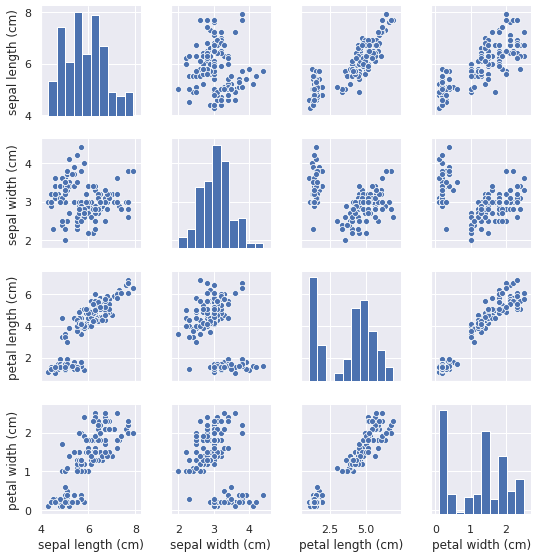

In [12]:
sns.pairplot(df, height=2)
plt.show()

Seabornでは、プロット関数にhue=カテゴリの列を指定することで、カテゴリ別に色分けしたグラフが表示されます。対角軸にはカテゴリの密度分布に替わります。

これで、どのデータが識別に有効か分かります。


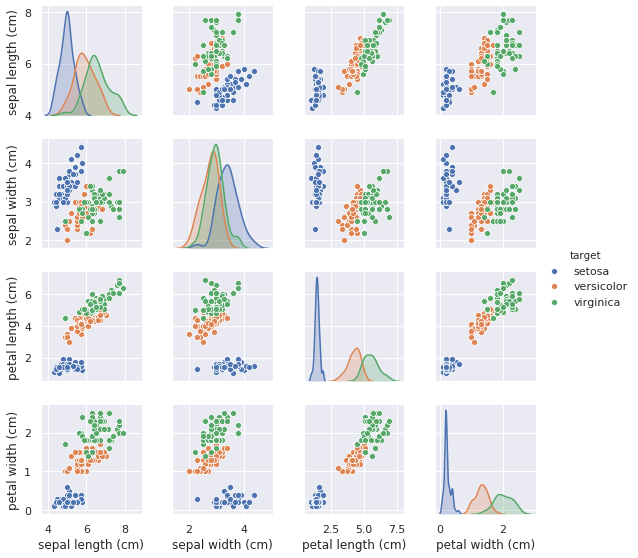

In [13]:
sns.pairplot(df, height=2, hue='target')
plt.show()

Seabornのグラフ機能の変わったところでは、箱ひげ図があります。
データの最大、最小と平均値を線で表示し、平均の上下四分位点を箱で囲みます。

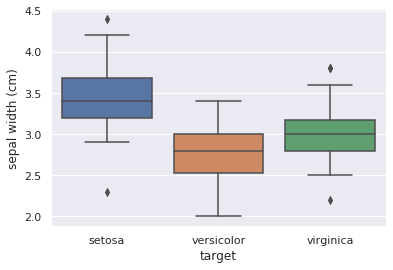

In [14]:
# 箱ひげ図
sns.boxplot(x='target', y='sepal width (cm)', data=df)
plt.show()

散布と一緒に回帰直線を表示するには、lmplot関数を使います。x軸とｙ軸のカラムを指定し、hueオプションでカテゴリを指定すると、以下のようにカテゴリ別の回帰直線が表示されます。

一見、直線にきれいにのったデータに見えるのですが、カテゴリ別の回帰直線は結構ずれているのが分かります。

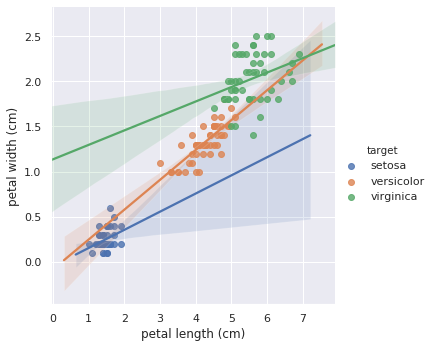

In [15]:
# target毎に回帰直線を求め、散布図に重ね合わせて表示
sns.lmplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=df)
plt.show()

## データの重ね合わせ
強力なグラフ機能をもつSeabornですが、データの重ねわせができません。

ここでは、Pandsを使ったデータの重ね合わせの方法を紹介します。
最初に紹介した「データ解析のための統計モデリング入門」のデータは、λ=3.56のポアソン分布に従うサンプルデータです。ポアソン分布は値が自然数（離散値）で平均と分散が同程度の場合に適応します。

### Rとの連携
Pythonではないが、Rでは計算できることがあります。
Pythonでもポアソンの確率分布は求めることができますが、Rとの連携の例として紹介します。

Rとの連携にはpyperライブラリを使用します。
PandasのデータフレームもできるようにRのインスタンスを生成します。




In [16]:
!pip install pyper

In [0]:
import pyper
r = pyper.R(use_pandas='True')

先に計算したhistgramからデータフレームdfを作り、データフレームのindexをxとして、Rに渡します。

次にRのdpois関数を使ってxに対するlambda=3.56のポアソン確率分布をRの変数yにセットします。

r.get関数を使ってRのy変数の結果をデータフレーム(dpois)にセットします。データ数が50個なので、50を掛けてヒストグラムと比較します。


In [0]:
df = pd.DataFrame(histgram)
df['x'] = df.index
r.assign("x", df.index)

In [0]:
r("y<-dpois(x, lambda=3.56)")
df['dpois'] = r.get("y")*50

In [35]:
df.head()

,data,x,dpois
3,12,3,10.692528
2,11,2,9.010557
4,10,4,9.516350
5,5,5,6.775641
7,4,7,2.044566


pandasのグラフの重ね書きでは、表示するグラフの軸データ(ax)を重ね書きするグラフのaxオプションにセットします。

また、散布図の点が前面に表示されるようにzorder=2としています。

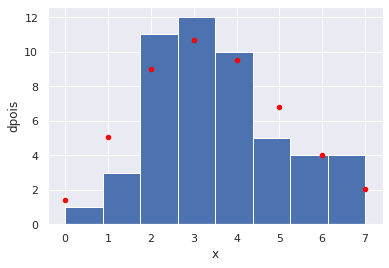

In [33]:
ax = d['data'].hist(bins=8)
scatter = df.plot.scatter(x='x', y='dpois', color='red', zorder=2, ax=ax)

## 関数のプロット
データではなく、関数の形をグラフで見たい時があります。
そんな時には、sympyのプロット機能を使います。




例として、ニューラルネットの活性化関数で使われているシグモイド関数の形を見てみましょう。
$$ 
s(x) = \frac{1}{1 - e^{-x}} 
$$

変数xをsymbolsでシンボル定義し、関数fの式をセットします。
plotting.plot関数でfとxの描画範囲を指定すると、関数の形がグラフで表示されます。


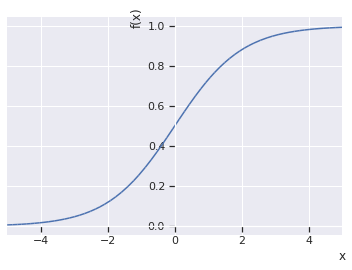

In [22]:
from sympy import *

# シグモイド関数をプロット
x = symbols('x')
f = 1/(1 + exp(-x))

plotting.plot(f, (x, -5, 5))
plt.show()